# Matematický software 

## Cv. 5 - Interpolace a aproximace

Prezentace: [POSEL](MS5_soubory/InterpAprox.pdf)

### Cognitive Apprenticeship

V tomto cvičení ...

In [ ]:
!python3 -m pip install numpy

In [ ]:
!python3 -m pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Aproximovaná funkce

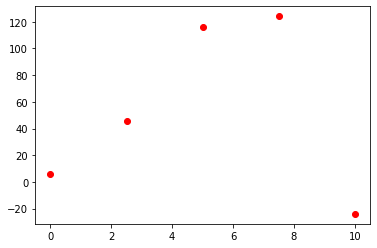

In [69]:
def f(x):
    return -x**3 + 10*x**2 - 3*x + 6

xstart = 0
xend = 10
nx = 5
dx = (xend - xstart)/nx
x = np.linspace(xstart, xend, nx)
fx = f(x)

plt.plot(x, fx, "ro")

#### Lineární interpolace

<img src="MS5_soubory/linear.png" alt="Drawing" style="width: 600px;"/>

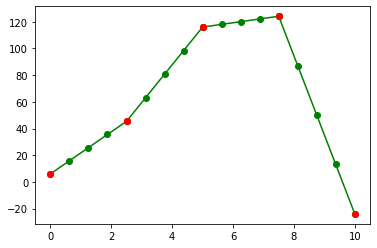

In [11]:
def linear(x, a, b):
    return f(a) + (f(b)-f(a))/(b-a)*(x-a)

phi = []
xphi = []

ninterpol = 5
for i in range(len(x)-1):
    xinterpol = np.linspace(x[i], x[i+1], ninterpol) #body, které mě zajímají uvnitř interpolační funkce
    g = linear(xinterpol, x[i], x[i+1]) #hodnoty bodů interpolační funkce
    xphi.extend(xinterpol)
    phi.extend(g)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

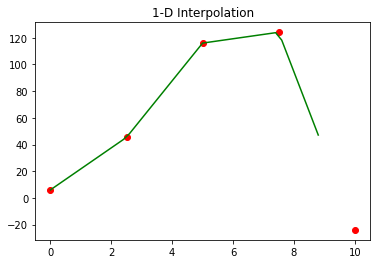

In [71]:
from scipy import interpolate

phi = interpolate.interp1d(x, fx)
xnew = np.arange(0, 9, 0.2)
ynew = phi(xnew)
  
plt.title("1-D Interpolation")
plt.plot(x, fx, 'ro', xnew, ynew, 'g-')
plt.show()

#### Vandermondova matice

<img src="MS5_soubory/vandermontova.png" alt="Drawing" style="width: 350px;"/>

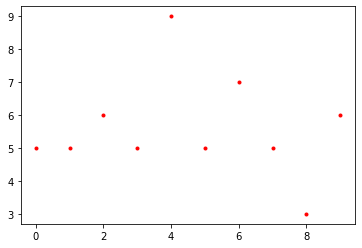

In [53]:
N = 10
x = np.arange(0,N)
y = np.random.randint(0,10,N)
plt.plot(x,y,'r.')
plt.show()

In [55]:
X = np.vander(x,increasing=True)
print(X[:5,:5])

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


In [58]:
import scipy.linalg as la
a = la.solve(X,y)
print(a)

[ 5.00000000e+00 -1.69638889e+02  4.35029960e+02 -4.34384733e+02
  2.26053125e+02 -6.81516782e+01  1.23395833e+01 -1.32280093e+00
  7.73313492e-02 -1.89869929e-03]


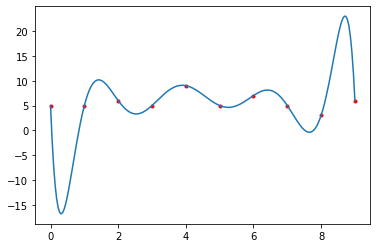

In [59]:
xs = np.linspace(0,N-1,200)
ys = sum([a[k]*xs**k for k in range(0,N)])
plt.plot(x,y,'r.',xs,ys)
plt.show()

#### Lagrangeova interpolace

<img src="MS5_soubory/lagrange.png" alt="Drawing" style="width: 600px;"/>

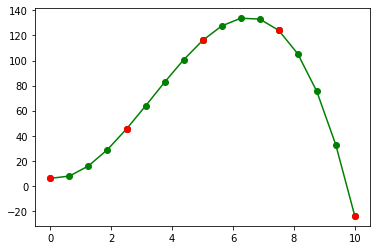

In [16]:
def lagrange(x, xs):
    Ln = 0
    for i in range(len(xs)):
        li = f(x[i])
        for j in range(len(xs)):
            li *= (x-x[j])/(x[i] - x[j]) if i != j else 1
        Ln += li
    return Ln

phi = []
xphi = []

ninterpol = 5
for i in range(len(x)-1):
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)
    g = lagrange(xinterpol, x)
    xphi.extend(xinterpol)
    phi.extend(g)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

cvičení

<img src="MS5_soubory/lagrangeukol.png" alt="Drawing" style="width: 600px;"/>

   3     2
1 x - 4 x + 3.053e-16 x + 10
[ 1.00000000e+00 -4.00000000e+00  3.05311332e-16  1.00000000e+01]


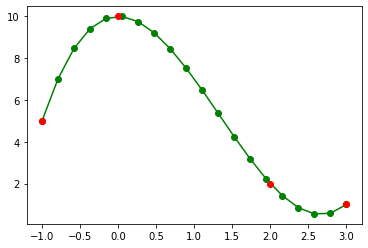

In [48]:
from scipy.interpolate import lagrange

x = np.array([-1, 0, 2, 3])
fx = np.array([5, 10, 2, 1])

phi = lagrange(x, fx)
print(phi)
print(phi.coef)

n = 20
xphi = np.linspace(x[0], x[-1], n)
plt.plot(xphi, phi(xphi), "go-")
plt.plot(x, fx, "ro")
plt.show()

cvičení

<img src="MS5_soubory/lagrangeukol2.png" alt="Drawing" style="width: 600px;"/>

         3     2
-0.4167 x + 1 x + 0.4167 x + 1
[-0.41666667  1.          0.41666667  1.        ]


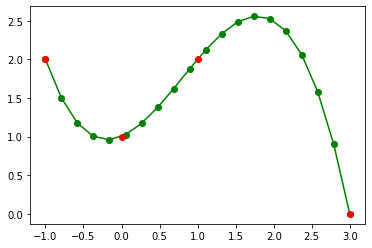

In [47]:
from scipy.interpolate import lagrange

x = np.array([-1, 0, 1, 3])
fx = np.array([2, 1, 2, 0])

phi = lagrange(x, fx)
print(phi)
print(phi.coef)

n = 20
xphi = np.linspace(x[0], x[-1], n)
plt.plot(xphi, phi(xphi), "go-")
plt.plot(x, fx, "ro")
plt.show()

#### Newtonova metoda

<img src="MS5_soubory/newton.png" alt="Drawing" style="width: 600px;"/>

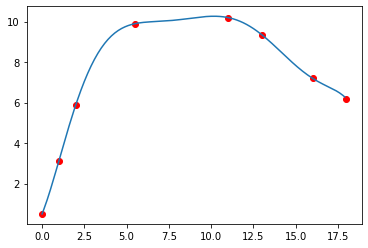

In [82]:
def divided_diff(x, y):    
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([0, 1, 2, 5.5, 11, 13, 16, 18])
y =  np.array([0.5, 3.134, 5.9, 9.9, 10.2, 9.35, 7.2, 6.2])

# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)


<img src="MS5_soubory/newtonspolu.png" alt="Drawing" style="width: 600px;"/>

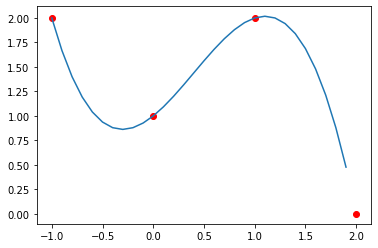

In [83]:
x = np.array([-1, 0, 1, 2])
y =  np.array([2, 1, 2, 0])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)

<img src="MS5_soubory/newtonspolu2.png" alt="Drawing" style="width: 600px;"/>

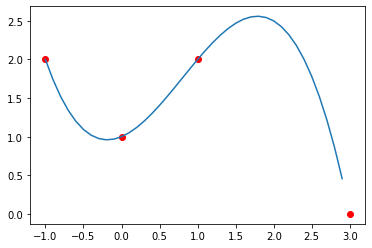

In [84]:
x = np.array([-1, 0, 1, 3])
y =  np.array([2, 1, 2, 0])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)

cvičení

<img src="MS5_soubory/newtonukol1.png" alt="Drawing" style="width: 600px;"/>

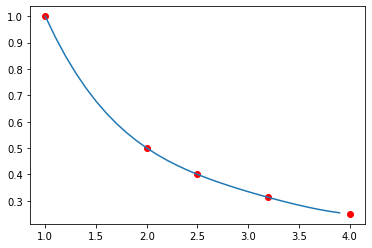

In [86]:
x = np.array([1, 2, 2.5, 3.2, 4])
y =  np.array(list(map(lambda x: 1/x, x)))

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)

<img src="MS5_soubory/newtonukol2.png" alt="Drawing" style="width: 600px;"/>

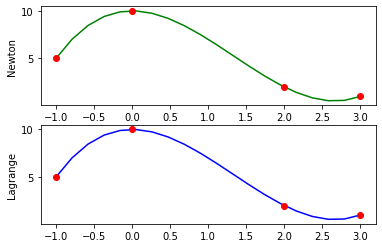

In [88]:
from scipy.interpolate import lagrange

x = np.array([-1, 0, 2, 3])
fx =  np.array([5, 10, 2, 1])

n = 20
xphi = np.linspace(x[0], x[-1], n)
phi_lagrange = lagrange(x, fx)

a_s = divided_diff(x, fx)[0, :]
phi_newton = newton_poly(a_s, x, xphi)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_ylabel('Newton')
ax1.plot(xphi, phi_newton, 'g-')
ax1.plot(x, fx, "ro")
ax2.set_ylabel('Lagrange')
ax2.plot(xphi, phi_lagrange(xphi), 'b-')
ax2.plot(x, fx, "ro")
plt.show()

#### Aproximace metodou nejmenších čtverců

<img src="MS5_soubory/nejmc.png" alt="Drawing" style="width: 500px;"/>

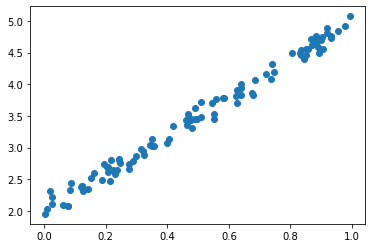

In [61]:
a0 = 2
a1 = 3
N = 100
x = np.random.rand(100)
noise = 0.1*np.random.randn(100)
y = a0 + a1*x + noise
plt.scatter(x,y)

In [63]:
X = np.column_stack([np.ones(N),x])
print(X.shape)
print(X[:5,:])

(100, 2)
[[1.         0.47750862]
 [1.         0.90736342]
 [1.         0.88958904]
 [1.         0.55313814]
 [1.         0.49724979]]


In [64]:
a = la.solve(X.T @ X, X.T @ y)
print(a)

[2.01289889 2.96077472]


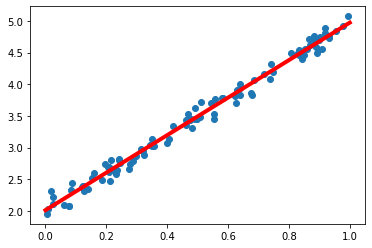

In [65]:
xs = np.linspace(0,1,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y)
plt.show()

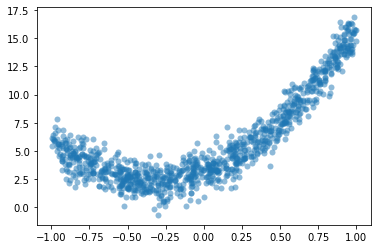

In [66]:
a0 = 3
a1 = 5
a2 = 8
N = 1000
x = 2*np.random.rand(N) - 1 # Random numbers in the interval (-1,1)
noise = np.random.randn(N)
y = a0 + a1*x + a2*x**2 + noise
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

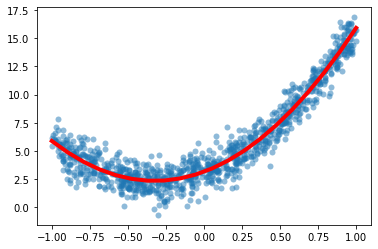

In [67]:
X = np.column_stack([np.ones(N),x,x**2])
a = la.solve((X.T @ X),X.T @ y)
xs = np.linspace(-1,1,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

<img src="MS5_soubory/nejmccviko.png" alt="Drawing" style="width: 700px;"/>

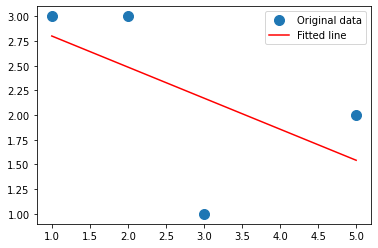

In [75]:
x = np.array([1, 2, 3, 5])
y = np.array([3, 3, 1, 2])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

<img src="MS5_soubory/nejmcukol.png" alt="Drawing" style="width: 700px;"/>

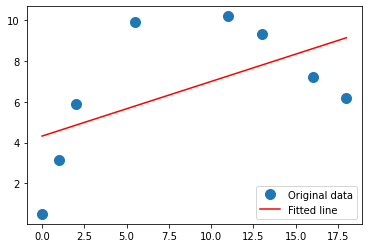

In [76]:
x = np.array([0, 1, 2, 5.5, 11, 13, 16, 18])
y =  np.array([0.5, 3.134, 5.9, 9.9, 10.2, 9.35, 7.2, 6.2])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()